In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dat = pd.read_csv(r'F:\AppliedDataScience\data\dat.csv')

In [4]:
dat.head()

,Unnamed: 0,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,...,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,predicted_output
0,0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,1
1,1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0
2,2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,1
3,3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0
4,4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0


In [5]:
dat.columns

Index(['Unnamed: 0', 'session_id', 'session_position', 'session_length',
       'track_id', 'skip_1', 'skip_2', 'skip_3', 'not_skipped',
       'context_switch', 'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'label', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_v

In [15]:
df = dat[['session_id','track_id', 'skip_1', 'skip_2', 'skip_3', 'not_skipped','context_switch']]

In [16]:
df.head(10)

,session_id,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0
1,0_00079a23-1600-486a-91bd-5208be0c745a,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0
5,0_01f86af2-cf48-42a6-9bf8-adb91f072909,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,True,True,False,0
6,0_02340c3b-c370-4c98-b759-87be85e11aa3,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,True,True,False,0
7,0_02a8ebbd-5a12-4343-a7da-2ea912102f90,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,False,0
8,0_032c39c8-3a11-4f90-a3c5-38461b4d365d,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,True,True,False,0
9,0_03373b7c-3c30-4bac-a909-1a4ecc310797,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,False,1


In [17]:
skip_1 = df['skip_1'].replace({False: 0,True: -1})
skip_1 = pd.DataFrame(skip_1)
skip_2 = df['skip_2'].replace({False: 0,True: -0.5})
skip_2 = pd.DataFrame(skip_2)
skip_3 = df['skip_3'].replace({False: 0,True: 0.2})
skip_3 = pd.DataFrame(skip_3)
not_skipped = df['not_skipped'].replace({False: 0,True: 1})
not_skipped = pd.DataFrame(not_skipped)

### replace columns###

df['skip_1']=skip_1
df['skip_2']=skip_2
df['skip_3']=skip_3
df['not_skipped']=not_skipped

C:\Users\Ted\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Ted\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Ted\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [18]:
df.head(15)

,session_id,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0.0,0.0,1,0
1,0_00079a23-1600-486a-91bd-5208be0c745a,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0.0,0.2,0,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0.0,0.0,1,0
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0.0,0.0,1,0
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0.0,0.2,0,0
5,0_01f86af2-cf48-42a6-9bf8-adb91f072909,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-1,-0.5,0.2,0,0
6,0_02340c3b-c370-4c98-b759-87be85e11aa3,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-1,-0.5,0.2,0,0
7,0_02a8ebbd-5a12-4343-a7da-2ea912102f90,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0.0,0.0,0,0
8,0_032c39c8-3a11-4f90-a3c5-38461b4d365d,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-1,-0.5,0.2,0,0
9,0_03373b7c-3c30-4bac-a909-1a4ecc310797,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0.0,0.0,0,1


In [10]:
skip_score = df['skip_1'] + df['skip_2']+ df['skip_3']+ df['not_skipped']
skip_score = pd.DataFrame(skip_score)

In [11]:
skip_score.head(10)

,0
0,1.0
1,0.2
2,1.0
3,1.0
4,0.2
5,-1.3
6,-1.3
7,0.0
8,-1.3
9,0.0


In [24]:
behavior = dat[['hist_user_behavior_reason_start','hist_user_behavior_reason_end','hist_user_behavior_is_shuffle']]

In [28]:
behavior.head(15)

,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hist_user_behavior_is_shuffle
0,trackdone,trackdone,True
1,fwdbtn,endplay,False
2,trackdone,trackdone,False
3,fwdbtn,trackdone,False
4,trackdone,fwdbtn,True
5,fwdbtn,fwdbtn,False
6,fwdbtn,fwdbtn,False
7,trackdone,fwdbtn,False
8,fwdbtn,fwdbtn,False
9,appload,fwdbtn,True


In [26]:
behavior.hist_user_behavior_reason_start.unique()

array(['trackdone', 'fwdbtn', 'appload', 'playbtn', 'clickrow', 'backbtn',
       'remote', 'endplay', 'trackerror'], dtype=object)

In [27]:
behavior.hist_user_behavior_reason_end.unique()

array(['trackdone', 'endplay', 'fwdbtn', 'backbtn', 'remote', 'logout',
       'clickrow'], dtype=object)

In [41]:
start = behavior['hist_user_behavior_reason_start'].replace({'trackdone': 1,'remote': 0,'backbtn':0.9,'clickrow':0.2,
                                                                'appload':0.2,'endplay':0.4,'playbtn':0.5,'trackerror':0,
                                                                'fwdbtn':0.3})
start = pd.DataFrame(start)



end = behavior['hist_user_behavior_reason_end'].replace({'trackdone': 1,'endplay':0.4,'fwdbtn':0.3,'backbtn':0.9,'remote':0,
                                                            'logout':0,'clickrow':0.2})
end = pd.DataFrame(end)


shuffle = behavior['hist_user_behavior_is_shuffle'].replace({True:1,False:0})
shuffle = pd.DataFrame(shuffle)

behavior['hist_user_behavior_reason_start'] = start
behavior['hist_user_behavior_reason_end'] = end
behavior['hist_user_behavior_is_shuffle'] = shuffle

C:\Users\Ted\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Ted\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ted\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [44]:
behavior.head(15)

,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hist_user_behavior_is_shuffle
0,1.0,1.0,1
1,0.3,0.4,0
2,1.0,1.0,0
3,0.3,1.0,0
4,1.0,0.3,1
5,0.3,0.3,0
6,0.3,0.3,0
7,1.0,0.3,0
8,0.3,0.3,0
9,0.2,0.3,1


In [52]:
liking1 = ((behavior['hist_user_behavior_reason_start'] * behavior['hist_user_behavior_reason_end']) + 
          behavior['hist_user_behavior_is_shuffle'])
liking1 = pd.DataFrame(liking1)

liking2 = ((behavior['hist_user_behavior_reason_start'] + behavior['hist_user_behavior_reason_end']) + 
          behavior['hist_user_behavior_is_shuffle'])
liking2 = pd.DataFrame(liking2)

In [54]:
liking1.head(15)

,0
0,2.00
1,0.12
2,1.00
3,0.30
4,1.30
5,0.09
6,0.09
7,0.30
8,0.09
9,1.06


C:\Users\Ted\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ted\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


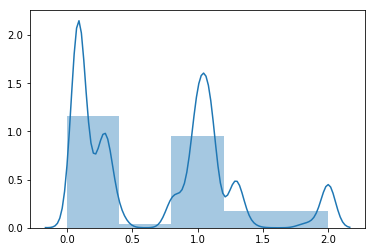

In [55]:
sns.distplot(liking1,bins = 5)
plt.show()

C:\Users\Ted\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ted\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


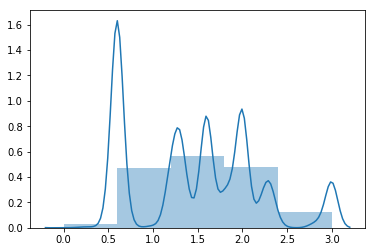

In [56]:
sns.distplot(liking2,bins = 5)
plt.show()

In [63]:
skip_score['liking'] = liking2


C:\Users\Ted\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ted\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


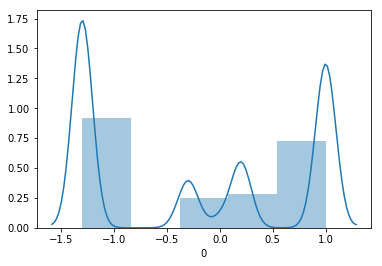

In [74]:
sns.distplot(skip_score[0],bins = 5)
plt.show()

In [78]:
from sklearn import preprocessing
liking_array = liking2.values


In [94]:
liking_array.shape

(167880, 1)

In [92]:
normalized_X = preprocessing.normalize([liking_array])

ValueError: Found array with dim 3. the normalize function expected <= 2.

In [118]:
liking_array.shape

(167880, 1)

In [119]:
liking_array

array([[3. ],
       [0.7],
       [2. ],
       ...,
       [3. ],
       [2.3],
       [1.6]])

In [121]:
zoopy = np.reshape(liking_array, (2, -1))

In [122]:
zoopy

array([[3. , 0.7, 2. , ..., 2. , 2. , 1.9],
       [2. , 3. , 0.6, ..., 3. , 2.3, 1.6]])

In [148]:
zoopy.shape

(83940, 2)

In [124]:
zoopy = zoopy.transpose()

In [125]:
zoopy.transpose()

array([[3. , 0.7, 2. , ..., 2. , 2. , 1.9],
       [2. , 3. , 0.6, ..., 3. , 2.3, 1.6]])

In [126]:
zoopy

array([[3. , 2. ],
       [0.7, 3. ],
       [2. , 0.6],
       ...,
       [2. , 3. ],
       [2. , 2.3],
       [1.9, 1.6]])

In [129]:
normalized_zoopy = preprocessing.normalize(zoopy)

In [130]:
normalized_zoopy

array([[0.83205029, 0.5547002 ],
       [0.22722962, 0.97384121],
       [0.95782629, 0.28734789],
       ...,
       [0.5547002 , 0.83205029],
       [0.65617871, 0.75460552],
       [0.7649112 , 0.64413575]])

In [131]:
like = normalized_zoopy.reshape(-1,1)

In [133]:
like = pd.DataFrame(like)

In [136]:
like.head(10)

,0
0,0.832050
1,0.554700
2,0.227230
3,0.973841
4,0.957826
5,0.287348
6,0.585491
7,0.810679
8,0.854199
9,0.519947


C:\Users\Ted\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ted\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


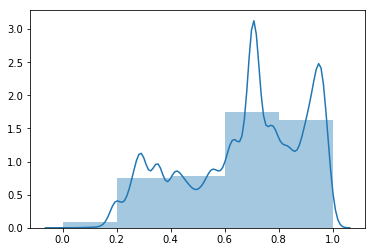

In [137]:
sns.distplot(like,bins = 5)
plt.show()

In [170]:
skip_score.head(10)

,0,liking
0,1.0,3.0
1,0.2,0.7
2,1.0,2.0
3,1.0,1.3
4,0.2,2.3
5,-1.3,0.6
6,-1.3,0.6
7,0.0,1.3
8,-1.3,0.6
9,0.0,1.5


In [171]:
like.head()

,0
0,0.832050
1,0.554700
2,0.227230
3,0.973841
4,0.957826


In [172]:
skip_score['normalized_liking'] = like

In [173]:
mul_label = skip_score

In [175]:
mul_label.head()

,0,liking,normalized_liking
0,1.0,3.0,0.832050
1,0.2,0.7,0.554700
2,1.0,2.0,0.227230
3,1.0,1.3,0.973841
4,0.2,2.3,0.957826


In [176]:
mul_label = mul_label.rename(columns = {0: "skip_score"})

In [177]:
mul_label.head(10)

,skip_score,liking,normalized_liking
0,1.0,3.0,0.832050
1,0.2,0.7,0.554700
2,1.0,2.0,0.227230
3,1.0,1.3,0.973841
4,0.2,2.3,0.957826
5,-1.3,0.6,0.287348
6,-1.3,0.6,0.585491
7,0.0,1.3,0.810679
8,-1.3,0.6,0.854199
9,0.0,1.5,0.519947
